### Project Setup
Make sure you do the following:

1. Set your project using "%projects set my-project-id"
2. Your cloud project needs to have Machine Learning, BigQuery, and DataFlow API enabled.
3. Run "!gcloud beta ml init-project -q" to initialize ML for your project. Note that you don't need to do this in the near future.
4. Prepare a GCS bucket.

In [1]:
bucket = 'gs://' + datalab_project_id() + '-coast'

In [2]:
!gsutil mb $bucket

Creating gs://bradley-playground-coast/...
ServiceException: 409 Bucket bradley-playground-coast already exists.


### Data Preparation

All data is under gs://cloud-datalab/sampledata/coast. Load the data from CSV files to Bigquery table.

In [3]:
import datalab.bigquery as bq

# Create the dataset
bq.Dataset('coast').create()

schema = [
  {'name':'image_url', 'type': 'STRING'},
  {'name':'label', 'type': 'STRING'},
]

# Create the table
train_table = bq.Table('coast.train').create(schema=schema, overwrite=True)
train_table.load('gs://cloud-datalab/sampledata/coast/train.csv', mode='overwrite', source_format='csv')
eval_table = bq.Table('coast.eval').create(schema=schema, overwrite=True)
eval_table.load('gs://cloud-datalab/sampledata/coast/eval.csv', mode='overwrite', source_format='csv')

Job bradley-playground/job_LCBGccSWFicZZGcKmfeZlhEJ9Jg completed

See the following file for the label description:

In [1]:
!gsutil cat gs://cloud-datalab/sampledata/coast/dict_explanation.csv

In [4]:
%%sql
SELECT image_url, label FROM coast.train

image_url,label
gs://tamucc_coastline/esi_images/IMG_3820_SecDE_Spr12.jpg,1
gs://tamucc_coastline/esi_images/IMG_1074_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_1077_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_1079_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_1084_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_1088_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_0411_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_0324_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_0321_SecABD_Sum12_Pt1.JPG,1
gs://tamucc_coastline/esi_images/IMG_0413_SecABD_Sum12_Pt1.JPG,1


### Explore Your Data

Sample the data to around 1000 instances for visualization. Our data is very simple, so we simply draw histogram on the labels and compare training and eval data.

In [5]:
from datalab.mlalpha import *
ds_train = BigQueryDataSet('coast.train')
ds_eval = BigQueryDataSet('coast.eval')

df_train = ds_train.sample(1000)
df_eval = ds_eval.sample(1000)

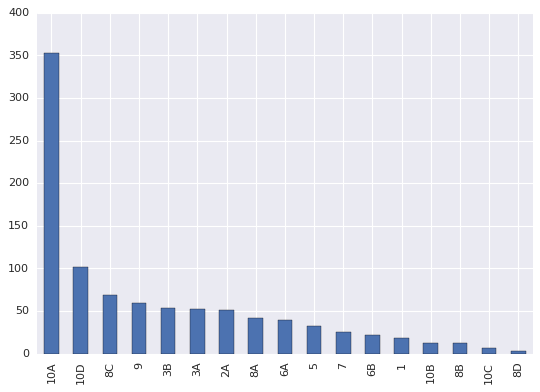

In [6]:
df_train.label.value_counts().plot(kind='bar')

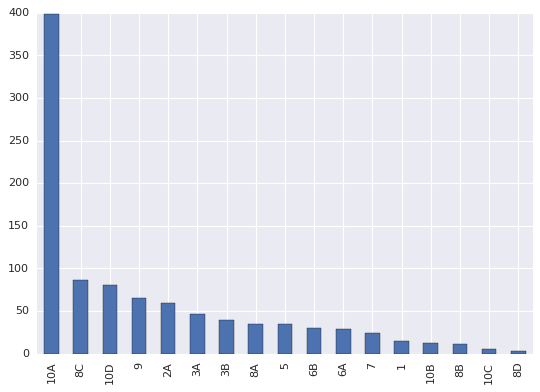

In [7]:
df_eval.label.value_counts().plot(kind='bar')